In [59]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

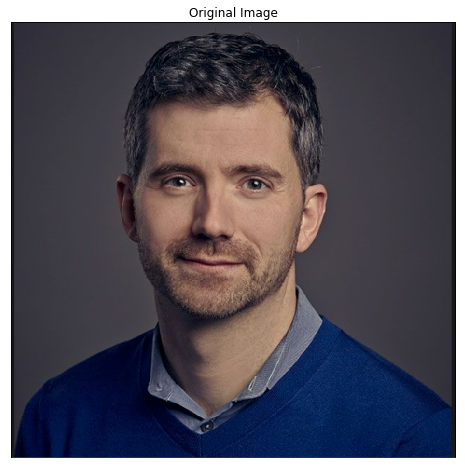

In [71]:
image = cv2.imread('image1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure( figsize = (8,8) )
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Original Image')

ax.imshow(image)

Face detection using Haar classifier:

In [89]:

def  detect_face(image, scale_factor, minNeighbours):    
    grayim = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    face_cascade= cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(grayim, scale_factor , minNeighbours)

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    copy_image = np.copy(image)
    # print(copy_image.shape)

    for (x,y,w,h) in faces:
        print(x,y,w,h)
        cv2.rectangle(copy_image, (x,y), (x+w,y+h), (255,0,0), 3)

    # Plot our image using subplots to specify a size and title
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    # to remove range labelling
    ax1.set_xticks([]) 
    ax1.set_yticks([])
    ax1.set_title('Image')
    ax1.imshow(copy_image)
    return copy_image

Number of faces detected: 1
236 177 384 384


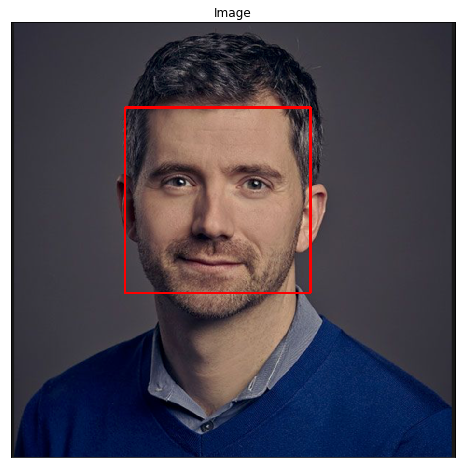

In [90]:
# For example
im = detect_face(image, 4, 6)

Number of eyes detected: 2
289 280 97 97
453 286 97 97


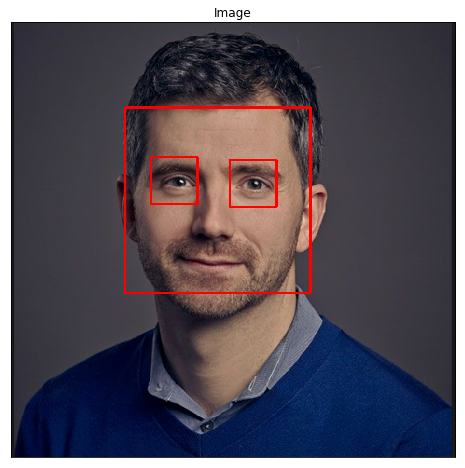

In [85]:
eye_cascade= cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# image, scale factor, min neighbours, - adjust scale accordingly.
eyes = eye_cascade.detectMultiScale(grayim, 2.2 , 3)

# Print the number of faces detected in the image
print('Number of eyes detected:', len(eyes))

# print(copy_image.shape)

for (x,y,w,h) in eyes:
    print(x,y,w,h)
    cv2.rectangle(copy_image, (x,y), (x+w,y+h), (255,0,0), 3)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
# to remove range labelling
ax1.set_xticks([]) 
ax1.set_yticks([])

ax1.set_title('Image')
ax1.imshow(copy_image)
plt.show()

In [ ]:
def plt_keypoints:
    